# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [ ]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [15]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [17]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

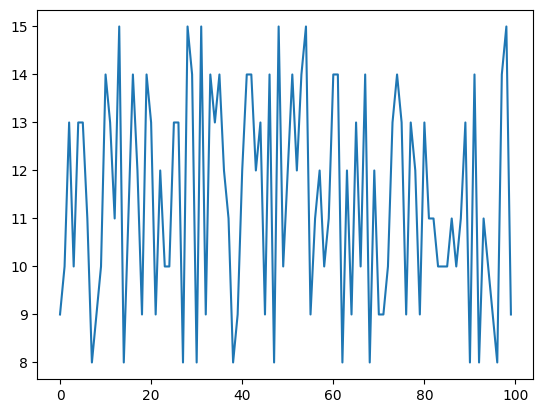

In [19]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

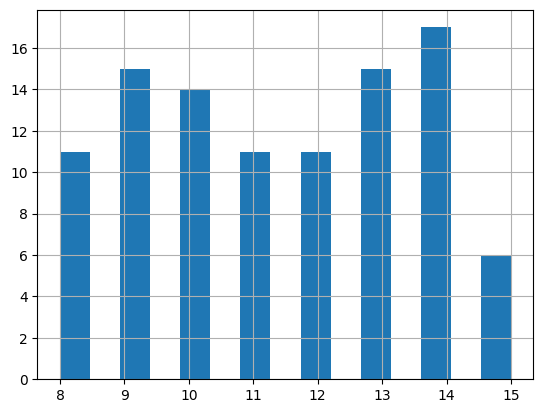

In [20]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [21]:
df.國文.mean()

np.float64(11.39)

算標準差。

In [22]:
df.國文.std()

np.float64(2.196852661459484)

不如就該算的都幫我們算算...

In [23]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [46]:
df.corr(numeric_only=True)
# 沒有加 umeric_only=True 會報錯

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [39]:
df.國文.corr(df.數學)

np.float64(-0.310898982217933)

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [72]:
df["總級分"] = df.sum(axis=1, numeric_only=True)
# 同 df.corr的概念，若沒有加 umeric_only=True 會報錯
df.head()

,姓名,國文,英文,數學,自然,社會,加權,總級分
0,劉俊安,9,10,15,10,13,49,106
1,胡玉華,10,10,10,8,9,40,87
2,黃淑婷,13,15,8,11,14,44,105
3,陳上紫,10,10,8,9,14,36,87
4,崔靜成,13,12,14,12,13,53,117


### 【技巧】

有計算的當然也可以的。

In [73]:
df["加權"] = df.國文 + df.英文 + df.數學 * 2

In [74]:
df.head()

,姓名,國文,英文,數學,自然,社會,加權,總級分
0,劉俊安,9,10,15,10,13,49,106
1,胡玉華,10,10,10,8,9,40,87
2,黃淑婷,13,15,8,11,14,44,105
3,陳上紫,10,10,8,9,14,36,87
4,崔靜成,13,12,14,12,13,53,117


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [75]:
df.sort_values(by="總級分", ascending=False).head()

,姓名,國文,英文,數學,自然,社會,加權,總級分
57,胡淳茜,12,15,14,13,11,55,120
25,蔡亦瑄,13,13,14,13,12,54,119
83,李士賢,10,14,15,13,13,54,119
36,詹威德,12,13,15,10,14,55,119
37,曾怡君,11,12,15,13,14,53,118


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [76]:
df2 = df.sort_values(by=["加權", "總級分"], ascending=False)

### 【重點】重設 index

In [77]:
df2.index = range(1, 101)
df2.head()

,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,117
2,胡淳茜,12,15,14,13,11,55,120
3,詹威德,12,13,15,10,14,55,119
4,蔡亦瑄,13,13,14,13,12,54,119
5,李士賢,10,14,15,13,13,54,119


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [78]:
df2[df2.數學 == 15]

,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,117
3,詹威德,12,13,15,10,14,55,119
5,李士賢,10,14,15,13,13,54,119
7,曾怡君,11,12,15,13,14,53,118
10,林哲法,14,9,15,10,14,53,115
13,陳竹伯,10,12,15,10,14,52,113
15,葉儀依,9,13,15,8,14,52,111
18,周育霖,9,12,15,13,12,51,112
21,張雅彬,10,11,15,12,8,51,107
22,芮秋辛,11,10,15,10,8,51,105


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [79]:
df2[(df2.數學 == 15) & (df2.英文 == 15)]
# 用 and 會報錯

,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,117


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [80]:
df2.drop("總級分", axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權,總級分
1,吳志遠,13,15,15,8,8,58,117
2,胡淳茜,12,15,14,13,11,55,120
3,詹威德,12,13,15,10,14,55,119
4,蔡亦瑄,13,13,14,13,12,54,119
5,李士賢,10,14,15,13,13,54,119
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36,87
97,胡凱琳,10,8,9,9,15,36,87
98,林建亨,9,11,8,8,11,36,83
99,梁慧君,9,8,8,8,12,33,78


In [81]:
df.drop("總級分", axis=1, inplace=True)
df

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,37
96,吳筱婷,8,10,14,10,15,46
97,陳家銘,14,9,11,8,12,45
98,李明威,15,9,8,9,15,40


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [82]:
df2.drop("總級分", axis=1, inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [85]:
df.head()

,姓名,國文,英文,數學,自然,社會,加權
0,劉俊安,9,10,15,10,13,49
1,胡玉華,10,10,10,8,9,40
2,黃淑婷,13,15,8,11,14,44
3,陳上紫,10,10,8,9,14,36
4,崔靜成,13,12,14,12,13,53


In [87]:
df2.drop(5).head()

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [88]:
df2[df2.姓名 == "李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
5,李士賢,10,14,15,13,13,54


In [89]:
df2.drop(df2[df2.姓名 == "李士賢"].index, inplace=True)
# df2[df2.姓名 == "李士賢"].index 找出符合條件的位子 >> df2.drop(5, inplace=True)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [ ]:
# import pandas_datareader as pdr
# df = pdr.get_data_yahoo('AAPL')

In [92]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [93]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [95]:
df = df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 20 日的移動平均

<Axes: xlabel='Date'>

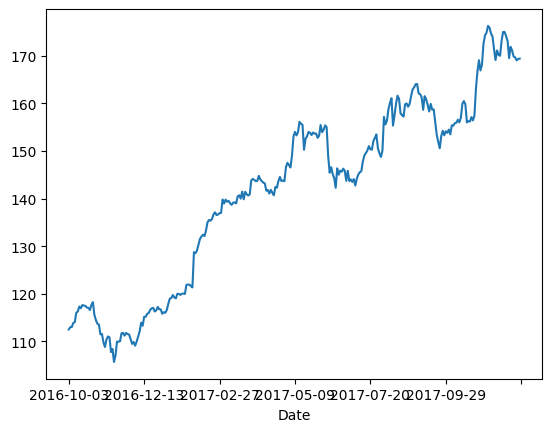

In [98]:
df.Close.plot()

<Axes: xlabel='Date'>

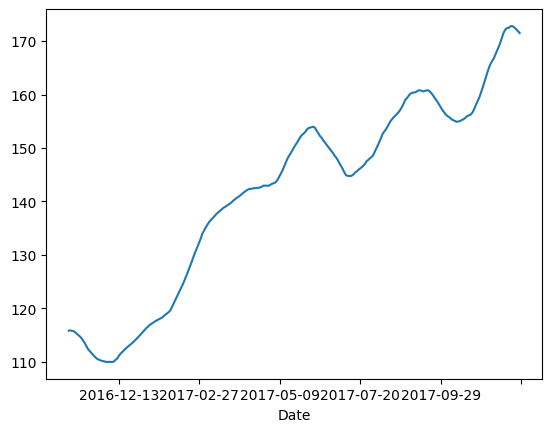

In [99]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

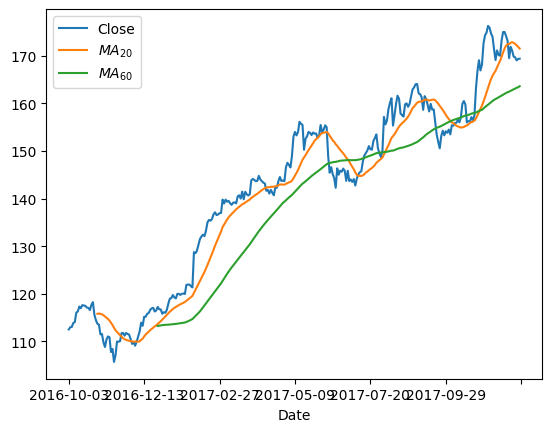

In [ ]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)
# {}：在 mathtext 裡會產生下標
# mathtext 內的英文預設斜體

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [104]:
close = df.Close.values
len(close)

300

In [105]:
x = close[:-1]
len(x)

299

In [106]:
y = close[1:]
len(y)

299

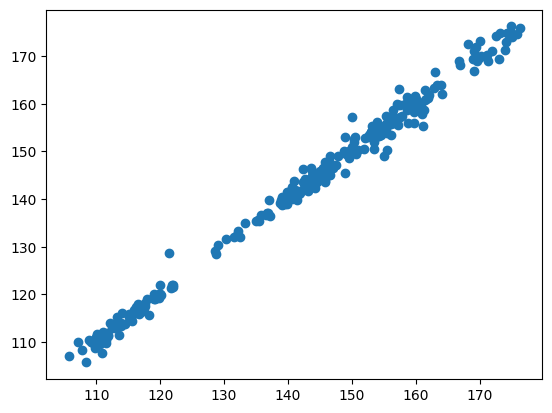

In [109]:
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [108]:
mydata = np.random.randn(4,3)

In [110]:
mydata

array([[-1.25364684,  0.32334025,  1.1697713 ],
       [-0.63151407, -0.25882154,  0.26595073],
       [ 0.33143214, -1.11180783,  0.77579249],
       [ 0.85442176,  0.74014784, -1.33929214]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [111]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [112]:
df2

,A,B,C
0,-1.253647,0.323340,1.169771
1,-0.631514,-0.258822,0.265951
2,0.331432,-1.111808,0.775792
3,0.854422,0.740148,-1.339292


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [113]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [114]:
df3

,A,B,C
0,0.130678,-0.212990,-2.254134
1,-1.304241,-0.309782,-0.197355
2,0.368819,-1.112025,-0.647738


In [116]:
df4 = pd.concat([df2, df3], axis=0)
# axis=0 代表縱向合併 (row-wise)

In [117]:
df4

,A,B,C
0,-1.253647,0.323340,1.169771
1,-0.631514,-0.258822,0.265951
2,0.331432,-1.111808,0.775792
3,0.854422,0.740148,-1.339292
0,0.130678,-0.212990,-2.254134
1,-1.304241,-0.309782,-0.197355
2,0.368819,-1.112025,-0.647738


前面我們弄得亂七八糟的 index 重設一下。

In [118]:
df4.index = range(7)

In [120]:
df4

,A,B,C
0,-1.253647,0.323340,1.169771
1,-0.631514,-0.258822,0.265951
2,0.331432,-1.111808,0.775792
3,0.854422,0.740148,-1.339292
4,0.130678,-0.212990,-2.254134
5,-1.304241,-0.309782,-0.197355
6,0.368819,-1.112025,-0.647738


#### 横向的貼

In [121]:
df5 = pd.concat([df2, df3], axis=1)
# axis=1 代表縱向合併 (row-wise)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [122]:
df5

,A,B,C,A,B,C
0,-1.253647,0.323340,1.169771,0.130678,-0.212990,-2.254134
1,-0.631514,-0.258822,0.265951,-1.304241,-0.309782,-0.197355
2,0.331432,-1.111808,0.775792,0.368819,-1.112025,-0.647738
3,0.854422,0.740148,-1.339292,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [123]:
df_names = pd.read_csv("data/names.csv", names=["姓名"])

In [127]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [128]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [149]:
df_grades.to_csv("data/grade2.csv", index=False)
# index=False 表示不把索引值存進去

In [150]:
df_grades

,國文,英文,數學,社會,自然
0,10,14,10,13,15
1,14,15,15,7,6
2,10,11,8,11,6
3,9,8,12,14,13
4,14,8,10,11,7
...,...,...,...,...,...
95,12,15,7,9,8
96,10,6,6,13,9
97,8,6,13,6,11
98,10,11,7,13,9


In [159]:
df_names = pd.read_csv("data/names.csv", names=["姓名"])
df_grades = pd.read_csv("data/grade2.csv")

In [160]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


In [153]:
df_grades

,國文,英文,數學,社會,自然
0,10,14,10,13,15
1,14,15,15,7,6
2,10,11,8,11,6
3,9,8,12,14,13
4,14,8,10,11,7
...,...,...,...,...,...
95,12,15,7,9,8
96,10,6,6,13,9
97,8,6,13,6,11
98,10,11,7,13,9


In [161]:
df_score = pd.concat([df_names, df_grades], axis=1)

In [162]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,10,14,10,13,15
1,王紹尹,14,15,15,7,6
2,黃季坤,10,11,8,11,6
3,許正書,9,8,12,14,13
4,張鈞蓮,14,8,10,11,7
...,...,...,...,...,...,...
95,陳君生,12,15,7,9,8
96,曾桂甫,10,6,6,13,9
97,林欣怡,8,6,13,6,11
98,林佳霖,10,11,7,13,9
